YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


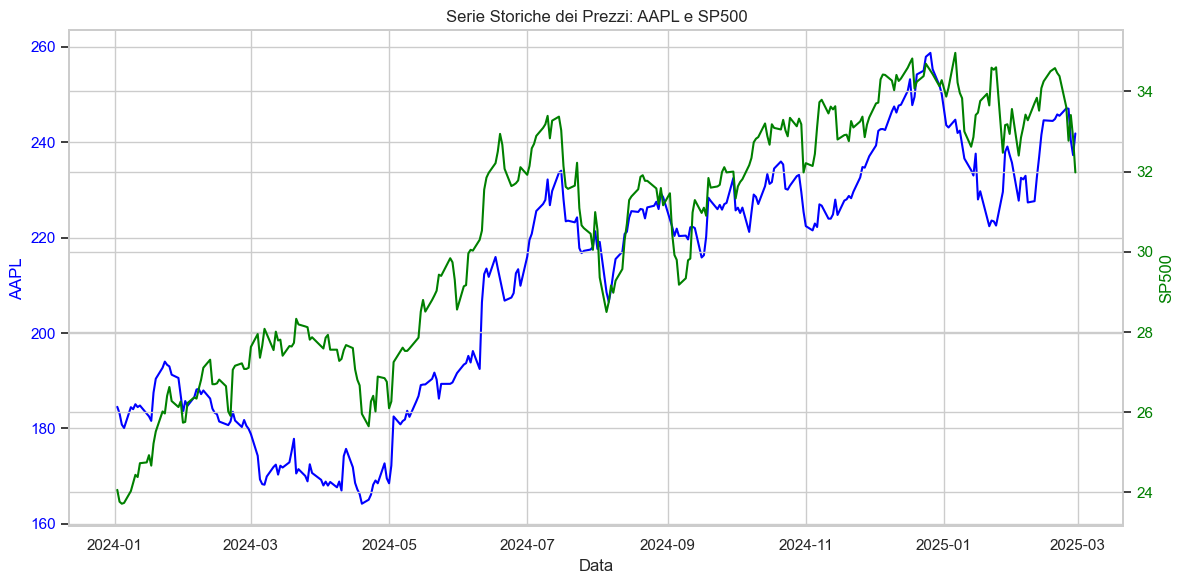

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     38.44
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           1.98e-09
Time:                        12:50:20   Log-Likelihood:                 1298.4
No. Observations:                 286   AIC:                            -2593.
Df Residuals:                     284   BIC:                            -2586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.000      0.826   

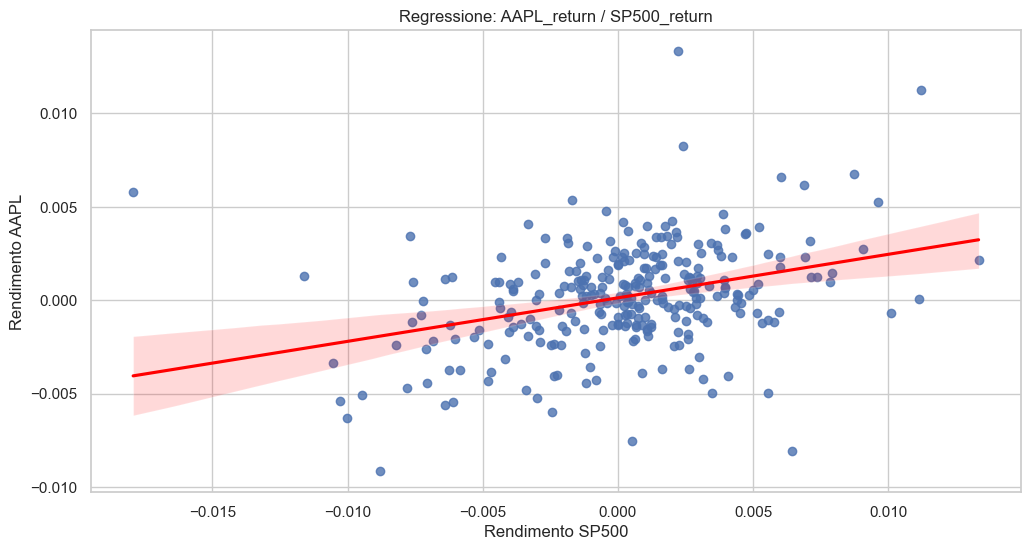

Text(0.5, 1.0, 'Istogramma dei Residui')

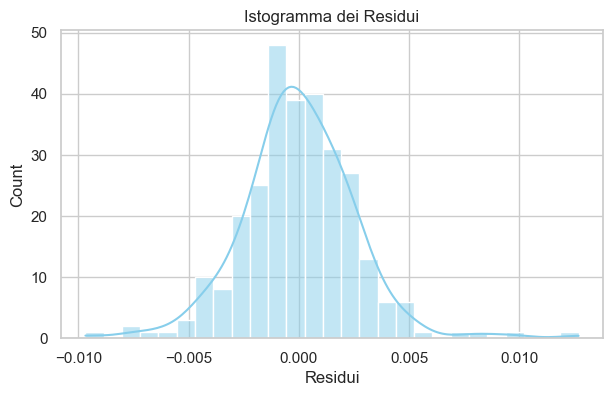

In [ ]:
### -----------------------  ANALISI DI REGRESSIONE DEI RENDIMENTI AAPL/SP500
import pandas as pd       # Importiamo alcune librerie
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import shapiro, jarque_bera, skew, kurtosis, norm
import statsmodels.api as sm


stocks = ['AAPL']                       # Definiamo il ticker
start = datetime(2024, 1, 1)              # Data di inizio del record
data = yf.download(stocks, start=start)   # Scarichiamo i dati
close = data.loc[:, "Close"]


# Impostazioni grafiche per i plot
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

ticker2 = "IE00B3WJKG14"
AAPL_close = close
SP500_close = yf.download(ticker2, start=start)["Close"].squeeze()

# Grafico con doppio asse Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Asse principale per AAPL
color_aapl = "blue"
ax1.set_xlabel("Data")
ax1.set_ylabel("AAPL", color=color_aapl)
ax1.plot(AAPL_close.index, AAPL_close, label="AAPL", color=color_aapl)
ax1.tick_params(axis="y", labelcolor=color_aapl)

# Asse secondario per SP500
ax2 = ax1.twinx()  # Crea un secondo asse Y che condivide l'asse X
color_sp500 = "green"
ax2.set_ylabel("SP500", color=color_sp500)
ax2.plot(SP500_close.index, SP500_close, label="SP500", color=color_sp500)
ax2.tick_params(axis="y", labelcolor=color_sp500)

plt.title("Serie Storiche dei Prezzi: AAPL e SP500")
fig.tight_layout()
plt.show()

# Calcolo dei rendimenti giornalieri
AAPL_rend = np.log(AAPL_close).pct_change().dropna().squeeze()
SP500_rend = np.log( SP500_close).pct_change().dropna().squeeze()

AAPL_rend, SP500_rend = AAPL_rend.align(SP500_rend, join="inner")


# Creazione e stima del modello di regressione OLS
X = SP500_rend  # Variabile indipendente
y = AAPL_rend   # Variabile dipendente

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print(model.summary())

# Plot della retta di regressione sovrapposta allo scatter plot
plt.figure()
sns.regplot(x=SP500_rend, y=AAPL_rend, line_kws={"color": "red"})
plt.xlabel("Rendimento SP500")
plt.ylabel("Rendimento AAPL")
plt.title("Regressione: AAPL_return / SP500_return")
plt.show()

# Analisi dei residui
residuals = model.resid.squeeze()      # Residui come Series monodimensionale
fitted = model.fittedvalues.squeeze()    # Valori fittati come Series

# Istogramma dei residui con curva di densità per verificare la normalità
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True, color="skyblue")
plt.xlabel("Residui")
plt.title("Istogramma dei Residui")
